Test environment config.

In [ ]:
import sys
print(sys.executable)
import torch
print(torch.__file__) 
print(torch.cuda.is_available())
from torch.utils import collect_env
print(collect_env.main())


Check if the environment has access to the NVIDIA A100 GPU.

In [ ]:
!nvidia-smi 

# Diffusion Model

A simple implementation of the diffusion model in PyTorch without text decoder and encoder for a full text-to-image generation pipeline.

In [1]:
import torch
import torchvision 
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import datasets, transforms 
# from torchvision.transforms import Compose, ToTensor, Lambda, Resize, CenterCrop, RandomHorizontalFlip, ToPILImage
from torch.utils.data import DataLoader
import numpy as np
from torch import nn
import math

e:\6CCS3\PRJ\codebase\6CCS2PRJ\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Results

Adam optimizer with learning rate 0.0001 and 3 epochs.

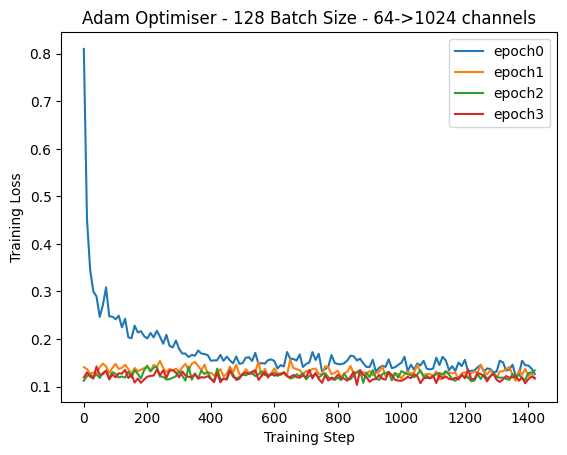

In [32]:
epoch0 = [[0.8100863695144653, 0], [0.4510430693626404, 10], [0.34475037455558777, 20], [0.2998737692832947, 30], [0.2894591689109802, 40], [0.24645492434501648, 50], [0.2709846496582031, 60], [0.30851155519485474, 70], [0.24770712852478027, 80], [0.24699142575263977, 90], [0.2414638102054596, 100], [0.2489309310913086, 110], [0.22454415261745453, 120], [0.2425607442855835, 130], [0.20375101268291473, 140], [0.2014467418193817, 150], [0.2280292510986328, 160], [0.21374623477458954, 170], [0.21645145118236542, 180], [0.2058776617050171, 190], [0.2010747641324997, 200], [0.21252912282943726, 210], [0.2033250778913498, 220], [0.21732382476329803, 230], [0.20442721247673035, 240], [0.19003888964653015, 250], [0.20872437953948975, 260], [0.18552765250205994, 270], [0.18227356672286987, 280], [0.1966681182384491, 290], [0.1792978048324585, 300], [0.16958537697792053, 310], [0.16935762763023376, 320], [0.16205179691314697, 330], [0.1664380431175232, 340], [0.1648334264755249, 350], [0.17585532367229462, 360], [0.16934522986412048, 370], [0.1683000773191452, 380], [0.16629210114479065, 390], [0.15454906225204468, 400], [0.1548251211643219, 410], [0.15539009869098663, 420], [0.16637763381004333, 430], [0.1541646122932434, 440], [0.1628686934709549, 450], [0.15500468015670776, 460], [0.1488020122051239, 470], [0.1631806641817093, 480], [0.14770576357841492, 490], [0.1491495966911316, 500], [0.1606217324733734, 510], [0.16176514327526093, 520], [0.15382502973079681, 530], [0.1709338277578354, 540], [0.1469205617904663, 550], [0.14944897592067719, 560], [0.14803063869476318, 570], [0.1554003804922104, 580], [0.15715500712394714, 590], [0.15369132161140442, 600], [0.1380854696035385, 610], [0.1449938416481018, 620], [0.14229604601860046, 630], [0.17256741225719452, 640], [0.15849709510803223, 650], [0.15781144797801971, 660], [0.15483379364013672, 670], [0.16741499304771423, 680], [0.1411139965057373, 690], [0.14758920669555664, 700], [0.15034376084804535, 710], [0.17242901027202606, 720], [0.1559290587902069, 730], [0.16893023252487183, 740], [0.13231752812862396, 750], [0.13675928115844727, 760], [0.14216533303260803, 770], [0.16623280942440033, 780], [0.14965203404426575, 790], [0.14722655713558197, 800], [0.14685460925102234, 810], [0.14913682639598846, 820], [0.15491729974746704, 830], [0.1647983193397522, 840], [0.1636657416820526, 850], [0.1548258513212204, 860], [0.15865817666053772, 870], [0.14891603589057922, 880], [0.14114487171173096, 890], [0.14116942882537842, 900], [0.15622082352638245, 910], [0.13077490031719208, 920], [0.1396188735961914, 930], [0.14376330375671387, 940], [0.1412200629711151, 950], [0.15711209177970886, 960], [0.1385902762413025, 970], [0.14062084257602692, 980], [0.14560920000076294, 990], [0.15007534623146057, 1000], [0.16267815232276917, 1010], [0.13234975934028625, 1020], [0.14580121636390686, 1030], [0.13521841168403625, 1040], [0.14839057624340057, 1050], [0.14431580901145935, 1060], [0.1541052907705307, 1070], [0.1373715102672577, 1080], [0.1360989809036255, 1090], [0.13778570294380188, 1100], [0.16058196127414703, 1110], [0.1452757716178894, 1120], [0.16253811120986938, 1130], [0.15482956171035767, 1140], [0.13435034453868866, 1150], [0.1427144557237625, 1160], [0.13278889656066895, 1170], [0.1505441963672638, 1180], [0.1429615616798401, 1190], [0.15618370473384857, 1200], [0.13223442435264587, 1210], [0.13314996659755707, 1220], [0.13366177678108215, 1230], [0.14072011411190033, 1240], [0.1447906643152237, 1250], [0.13126304745674133, 1260], [0.13814137876033783, 1270], [0.13686060905456543, 1280], [0.13002614676952362, 1290], [0.13141891360282898, 1300], [0.154291033744812, 1310], [0.15081460773944855, 1320], [0.13366146385669708, 1330], [0.13537384569644928, 1340], [0.14602190256118774, 1350], [0.12265919148921967, 1360], [0.12479075789451599, 1370], [0.15423128008842468, 1380], [0.14483484625816345, 1390], [0.14425250887870789, 1400], [0.13762877881526947, 1410], [0.12648801505565643, 1420]]
epoch1 = [[0.14068108797073364, 0], [0.13694602251052856, 10], [0.12637534737586975, 20], [0.12968072295188904, 30], [0.12735480070114136, 40], [0.14053837954998016, 50], [0.14821629226207733, 60], [0.14245837926864624, 70], [0.127831369638443, 80], [0.13948634266853333, 90], [0.14767225086688995, 100], [0.13694798946380615, 110], [0.13938912749290466, 120], [0.14568471908569336, 130], [0.13680914044380188, 140], [0.12690341472625732, 150], [0.13918285071849823, 160], [0.13217952847480774, 170], [0.13552162051200867, 180], [0.13876977562904358, 190], [0.1422959864139557, 200], [0.13240204751491547, 210], [0.14548629522323608, 220], [0.1417292356491089, 230], [0.15390527248382568, 240], [0.1386476755142212, 250], [0.12993106245994568, 260], [0.13719022274017334, 270], [0.1338179111480713, 280], [0.13755014538764954, 290], [0.1308935135602951, 300], [0.14013010263442993, 310], [0.1476815789937973, 320], [0.13406766951084137, 330], [0.1481305956840515, 340], [0.15170592069625854, 350], [0.1436493992805481, 360], [0.13382300734519958, 370], [0.1460985392332077, 380], [0.1277150809764862, 390], [0.12920473515987396, 400], [0.12332586944103241, 410], [0.12953653931617737, 420], [0.13672852516174316, 430], [0.12124587595462799, 440], [0.12641409039497375, 450], [0.1419999599456787, 460], [0.12951380014419556, 470], [0.14614325761795044, 480], [0.1252557635307312, 490], [0.12398334592580795, 500], [0.1364341676235199, 510], [0.1289215087890625, 520], [0.1259746104478836, 530], [0.1304997056722641, 540], [0.1525523066520691, 550], [0.12157568335533142, 560], [0.13733403384685516, 570], [0.12171666324138641, 580], [0.12693703174591064, 590], [0.13823547959327698, 600], [0.12734636664390564, 610], [0.12773872911930084, 620], [0.1287832409143448, 630], [0.12479545176029205, 640], [0.1567244976758957, 650], [0.13908006250858307, 660], [0.1365424543619156, 670], [0.13433735072612762, 680], [0.12514343857765198, 690], [0.1329289972782135, 700], [0.1308310627937317, 710], [0.1370212882757187, 720], [0.13774606585502625, 730], [0.1268409937620163, 740], [0.12531964480876923, 750], [0.14285515248775482, 760], [0.1402924358844757, 770], [0.12601837515830994, 780], [0.12876830995082855, 790], [0.1333293616771698, 800], [0.11905007809400558, 810], [0.12781457602977753, 820], [0.13115763664245605, 830], [0.14316082000732422, 840], [0.1268596649169922, 850], [0.12967047095298767, 860], [0.12521398067474365, 870], [0.13030731678009033, 880], [0.12729904055595398, 890], [0.1323041319847107, 900], [0.12363680452108383, 910], [0.12794268131256104, 920], [0.13138028979301453, 930], [0.14215296506881714, 940], [0.12236867845058441, 950], [0.1280568540096283, 960], [0.1233299970626831, 970], [0.12675124406814575, 980], [0.12615041434764862, 990], [0.11687524616718292, 1000], [0.12639373540878296, 1010], [0.13166546821594238, 1020], [0.12708985805511475, 1030], [0.1297854781150818, 1040], [0.14552843570709229, 1050], [0.1309412568807602, 1060], [0.12427788972854614, 1070], [0.12621255218982697, 1080], [0.1266947090625763, 1090], [0.12202601134777069, 1100], [0.13173460960388184, 1110], [0.11494588106870651, 1120], [0.11719152331352234, 1130], [0.13087770342826843, 1140], [0.12966221570968628, 1150], [0.12760671973228455, 1160], [0.12931108474731445, 1170], [0.11582636833190918, 1180], [0.1274215131998062, 1190], [0.13033358752727509, 1200], [0.11755671352148056, 1210], [0.1280311495065689, 1220], [0.13166938722133636, 1230], [0.1290958821773529, 1240], [0.1462133228778839, 1250], [0.13066457211971283, 1260], [0.12573346495628357, 1270], [0.1346726268529892, 1280], [0.1269243210554123, 1290], [0.11833499372005463, 1300], [0.13153305649757385, 1310], [0.13235945999622345, 1320], [0.13576899468898773, 1330], [0.14146476984024048, 1340], [0.1239578053355217, 1350], [0.11221187561750412, 1360], [0.1337704211473465, 1370], [0.12471695244312286, 1380], [0.13733619451522827, 1390], [0.12209337949752808, 1400], [0.1282322108745575, 1410], [0.11558085680007935, 1420]]
epoch2 = [[0.1122107058763504, 0], [0.12206485122442245, 10], [0.12530946731567383, 20], [0.11987936496734619, 30], [0.1254105418920517, 40], [0.11808842420578003, 50], [0.12885114550590515, 60], [0.13192276656627655, 70], [0.11793327331542969, 80], [0.13015775382518768, 90], [0.12657928466796875, 100], [0.11902948468923569, 110], [0.12107710540294647, 120], [0.11883886903524399, 130], [0.13085663318634033, 140], [0.11905299872159958, 150], [0.1345410943031311, 160], [0.12648442387580872, 170], [0.11705990880727768, 180], [0.13448303937911987, 190], [0.14357559382915497, 200], [0.1319049745798111, 210], [0.13979512453079224, 220], [0.14132243394851685, 230], [0.12099440395832062, 240], [0.12063121795654297, 250], [0.1149045079946518, 260], [0.11537440866231918, 270], [0.1185528039932251, 280], [0.121604785323143, 290], [0.13213661313056946, 300], [0.12318819761276245, 310], [0.11247395724058151, 320], [0.14205524325370789, 330], [0.11445914208889008, 340], [0.12770022451877594, 350], [0.11747968196868896, 360], [0.13319382071495056, 370], [0.1262010633945465, 380], [0.13082627952098846, 390], [0.11704530566930771, 400], [0.11103057861328125, 410], [0.13776585459709167, 420], [0.11518540978431702, 430], [0.11602537333965302, 440], [0.11656749248504639, 450], [0.13506045937538147, 460], [0.12035121768712997, 470], [0.11731640994548798, 480], [0.11954667419195175, 490], [0.12492792308330536, 500], [0.12381687015295029, 510], [0.12723150849342346, 520], [0.12803614139556885, 530], [0.12201383709907532, 540], [0.12560290098190308, 550], [0.13181239366531372, 560], [0.12377898395061493, 570], [0.12502816319465637, 580], [0.12424024939537048, 590], [0.12918812036514282, 600], [0.1223071813583374, 610], [0.12575003504753113, 620], [0.1305360645055771, 630], [0.12221723794937134, 640], [0.11691014468669891, 650], [0.11882828921079636, 660], [0.12575401365756989, 670], [0.12173579633235931, 680], [0.12794853746891022, 690], [0.11518102139234543, 700], [0.12238731980323792, 710], [0.1226096972823143, 720], [0.1261686533689499, 730], [0.11858074367046356, 740], [0.12473350763320923, 750], [0.12800322473049164, 760], [0.11955080926418304, 770], [0.11584675312042236, 780], [0.11388345062732697, 790], [0.11879739165306091, 800], [0.11345413327217102, 810], [0.12671151757240295, 820], [0.11681671440601349, 830], [0.11536774039268494, 840], [0.12345646321773529, 850], [0.13113930821418762, 860], [0.13387031853199005, 870], [0.10774555057287216, 880], [0.1293906569480896, 890], [0.11988472938537598, 900], [0.13476018607616425, 910], [0.11692957580089569, 920], [0.11381858587265015, 930], [0.12608885765075684, 940], [0.1283179223537445, 950], [0.13099884986877441, 960], [0.11304976046085358, 970], [0.12870651483535767, 980], [0.11871706694364548, 990], [0.13249853253364563, 1000], [0.12907683849334717, 1010], [0.12561677396297455, 1020], [0.12430187314748764, 1030], [0.11953271925449371, 1040], [0.1254313439130783, 1050], [0.13426688313484192, 1060], [0.12023155391216278, 1070], [0.12278036773204803, 1080], [0.1177707314491272, 1090], [0.12000109255313873, 1100], [0.12670326232910156, 1110], [0.128639817237854, 1120], [0.12533186376094818, 1130], [0.13244232535362244, 1140], [0.12505203485488892, 1150], [0.11584758013486862, 1160], [0.11203914880752563, 1170], [0.11881427466869354, 1180], [0.12259648740291595, 1190], [0.12098859250545502, 1200], [0.11931827664375305, 1210], [0.11115732043981552, 1220], [0.11247847974300385, 1230], [0.1258479803800583, 1240], [0.11605849117040634, 1250], [0.12544162571430206, 1260], [0.11679752916097641, 1270], [0.1208096370100975, 1280], [0.12936434149742126, 1290], [0.12019529193639755, 1300], [0.11865433305501938, 1310], [0.11886818706989288, 1320], [0.1162133514881134, 1330], [0.11390247195959091, 1340], [0.12664765119552612, 1350], [0.11792924255132675, 1360], [0.1255347728729248, 1370], [0.11704271286725998, 1380], [0.11393082141876221, 1390], [0.12866126000881195, 1400], [0.12935596704483032, 1410], [0.13388416171073914, 1420]]
epoch3 = [[0.11938553303480148, 0], [0.12963160872459412, 10], [0.12099280208349228, 20], [0.11677572131156921, 30], [0.14220553636550903, 40], [0.1245100349187851, 50], [0.12601201236248016, 60], [0.13384294509887695, 70], [0.11499544233083725, 80], [0.12524525821208954, 90], [0.11923402547836304, 100], [0.12765760719776154, 110], [0.1272328794002533, 120], [0.1352233737707138, 130], [0.11796297878026962, 140], [0.12627959251403809, 150], [0.10838556289672852, 160], [0.11690399050712585, 170], [0.10782825946807861, 180], [0.11496531963348389, 190], [0.12078529596328735, 200], [0.12230396270751953, 210], [0.12318187952041626, 220], [0.13571371138095856, 230], [0.12357477843761444, 240], [0.13426658511161804, 250], [0.11845123022794724, 260], [0.13352414965629578, 270], [0.13422666490077972, 280], [0.129361093044281, 290], [0.11954163759946823, 300], [0.1317596286535263, 310], [0.12331277132034302, 320], [0.12019000947475433, 330], [0.12048902362585068, 340], [0.12566837668418884, 350], [0.11647830903530121, 360], [0.11984008550643921, 370], [0.11865301430225372, 380], [0.121879443526268, 390], [0.11627699434757233, 400], [0.10911862552165985, 410], [0.12931720912456512, 420], [0.10922592878341675, 430], [0.11687686294317245, 440], [0.11445552110671997, 450], [0.132594496011734, 460], [0.12493675202131271, 470], [0.1138690710067749, 480], [0.11640377342700958, 490], [0.12695780396461487, 500], [0.12949290871620178, 510], [0.12686680257320404, 520], [0.13119494915008545, 530], [0.13433724641799927, 540], [0.11418267339468002, 550], [0.12259583920240402, 560], [0.1304367482662201, 570], [0.11890535056591034, 580], [0.12728235125541687, 590], [0.12270702421665192, 600], [0.12564371526241302, 610], [0.12515603005886078, 620], [0.12865158915519714, 630], [0.12182527035474777, 640], [0.11989349126815796, 650], [0.12423497438430786, 660], [0.11977153271436691, 670], [0.11855264753103256, 680], [0.12309327721595764, 690], [0.11910665035247803, 700], [0.13482369482517242, 710], [0.11697357892990112, 720], [0.12881582975387573, 730], [0.11565451323986053, 740], [0.10793356597423553, 750], [0.1236235722899437, 760], [0.11260547488927841, 770], [0.11869173496961594, 780], [0.116524837911129, 790], [0.12472750246524811, 800], [0.11822584271430969, 810], [0.11649921536445618, 820], [0.11214077472686768, 830], [0.12066195905208588, 840], [0.1312669813632965, 850], [0.10339554399251938, 860], [0.13455185294151306, 870], [0.12496541440486908, 880], [0.12014266103506088, 890], [0.10989908874034882, 900], [0.11496396362781525, 910], [0.1157994493842125, 920], [0.12500575184822083, 930], [0.11635419726371765, 940], [0.11454089730978012, 950], [0.13066571950912476, 960], [0.12385246157646179, 970], [0.11424299329519272, 980], [0.11245284974575043, 990], [0.11192276328802109, 1000], [0.11543039977550507, 1010], [0.12033649533987045, 1020], [0.11757856607437134, 1030], [0.12614242732524872, 1040], [0.12222972512245178, 1050], [0.1070750504732132, 1060], [0.11732666194438934, 1070], [0.1183992326259613, 1080], [0.11702404916286469, 1090], [0.12292857468128204, 1100], [0.10745105147361755, 1110], [0.12453514337539673, 1120], [0.11704772710800171, 1130], [0.12121566385030746, 1140], [0.11607252806425095, 1150], [0.11478930711746216, 1160], [0.11863263696432114, 1170], [0.11470617353916168, 1180], [0.12543974816799164, 1190], [0.11709998548030853, 1200], [0.13600598275661469, 1210], [0.11598348617553711, 1220], [0.11583130061626434, 1230], [0.12847910821437836, 1240], [0.1262865662574768, 1250], [0.12206858396530151, 1260], [0.11081689596176147, 1270], [0.12191557884216309, 1280], [0.1265561580657959, 1290], [0.11408292502164841, 1300], [0.1096763014793396, 1310], [0.11492487788200378, 1320], [0.1220715269446373, 1330], [0.1184009537100792, 1340], [0.11978992074728012, 1350], [0.12280311435461044, 1360], [0.11214693635702133, 1370], [0.11921018362045288, 1380], [0.10689269006252289, 1390], [0.11583595722913742, 1400], [0.12080492824316025, 1410], [0.11820763349533081, 1420]]
# Convert 2d array to 1d array x and y for each epoch
# for i in range(0, 4):
#     loss, step = zip(*epoch[i
loss, step = zip(*epoch0)
loss1, step1 = zip(*epoch1)
loss2, step2 = zip(*epoch2)
loss3, step3 = zip(*epoch3)
plt.plot(step, loss, label='epoch0')
plt.plot(step1, loss1, label='epoch1')
plt.plot(step2, loss2, label='epoch2')
plt.plot(step3, loss3, label='epoch3')
plt.xlabel("Training Step")
plt.ylabel("Training Loss")
plt.title("Adam Optimiser - 128 Batch Size - 64->1024 channels")
plt.legend()

Text(0.5, 1.0, 'Adam Optimiser - 500 Steps')

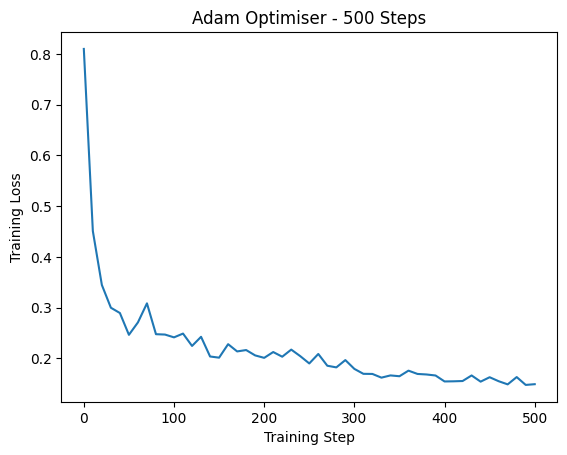

In [35]:
epoch500steps = [[0.8100863695144653, 0], [0.4510430693626404, 10], [0.34475037455558777, 20], [0.2998737692832947, 30], [0.2894591689109802, 40], [0.24645492434501648, 50], [0.2709846496582031, 60], [0.30851155519485474, 70], [0.24770712852478027, 80], [0.24699142575263977, 90], [0.2414638102054596, 100], [0.2489309310913086, 110], [0.22454415261745453, 120], [0.2425607442855835, 130], [0.20375101268291473, 140], [0.2014467418193817, 150], [0.2280292510986328, 160], [0.21374623477458954, 170], [0.21645145118236542, 180], [0.2058776617050171, 190], [0.2010747641324997, 200], [0.21252912282943726, 210], [0.2033250778913498, 220], [0.21732382476329803, 230], [0.20442721247673035, 240], [0.19003888964653015, 250], [0.20872437953948975, 260], [0.18552765250205994, 270], [0.18227356672286987, 280], [0.1966681182384491, 290], [0.1792978048324585, 300], [0.16958537697792053, 310], [0.16935762763023376, 320], [0.16205179691314697, 330], [0.1664380431175232, 340], [0.1648334264755249, 350], [0.17585532367229462, 360], [0.16934522986412048, 370], [0.1683000773191452, 380], [0.16629210114479065, 390], [0.15454906225204468, 400], [0.1548251211643219, 410], [0.15539009869098663, 420], [0.16637763381004333, 430], [0.1541646122932434, 440], [0.1628686934709549, 450], [0.15500468015670776, 460], [0.1488020122051239, 470], [0.1631806641817093, 480], [0.14770576357841492, 490], [0.1491495966911316, 500]]

loss500, step500 = zip(*epoch500steps)
plt.plot(step500, loss500)
plt.xlabel("Training Step")
plt.ylabel("Training Loss")
plt.title("Adam Optimiser - 500 Steps")


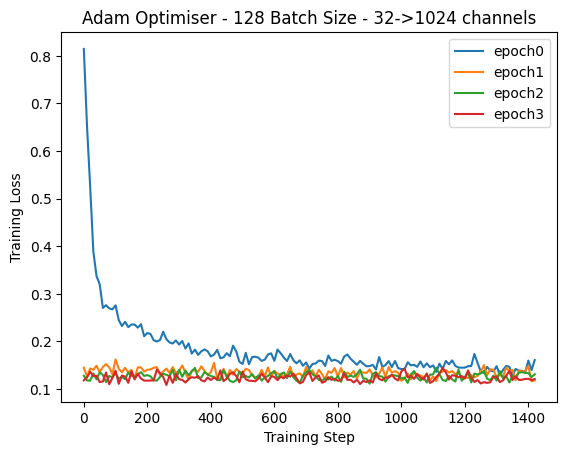

In [25]:
epoch0 = [[0.814482569694519, 0], [0.653007984161377, 10], [0.5247682332992554, 20], [0.3885045051574707, 30], [0.3373740613460541, 40], [0.32017403841018677, 50], [0.27039384841918945, 60], [0.2761901319026947, 70], [0.2694776952266693, 80], [0.26750385761260986, 90], [0.2759159803390503, 100], [0.24478602409362793, 110], [0.2325403392314911, 120], [0.24118173122406006, 130], [0.23010437190532684, 140], [0.23577961325645447, 150], [0.23545587062835693, 160], [0.22900573909282684, 170], [0.23624388873577118, 180], [0.21097791194915771, 190], [0.21773993968963623, 200], [0.21573907136917114, 210], [0.2024945467710495, 220], [0.1999398171901703, 230], [0.2029217928647995, 240], [0.22044062614440918, 250], [0.20475010573863983, 260], [0.19799821078777313, 270], [0.19568321108818054, 280], [0.20209884643554688, 290], [0.19336733222007751, 300], [0.20094478130340576, 310], [0.1851026862859726, 320], [0.19597578048706055, 330], [0.17450979351997375, 340], [0.18288561701774597, 350], [0.17181628942489624, 360], [0.17935505509376526, 370], [0.18325507640838623, 380], [0.1793985366821289, 390], [0.1686384379863739, 400], [0.1722208559513092, 410], [0.18232157826423645, 420], [0.1647263467311859, 430], [0.16665537655353546, 440], [0.1754046380519867, 450], [0.169063001871109, 460], [0.19122374057769775, 470], [0.17892131209373474, 480], [0.15730467438697815, 490], [0.1527089774608612, 500], [0.17614516615867615, 510], [0.15211056172847748, 520], [0.16719216108322144, 530], [0.16804680228233337, 540], [0.16583684086799622, 550], [0.1591385006904602, 560], [0.16181835532188416, 570], [0.17272591590881348, 580], [0.1750299334526062, 590], [0.15929551422595978, 600], [0.1831110119819641, 610], [0.17517809569835663, 620], [0.16608235239982605, 630], [0.15903235971927643, 640], [0.1736440360546112, 650], [0.16037461161613464, 660], [0.15413741767406464, 670], [0.16033002734184265, 680], [0.1487962007522583, 690], [0.15590623021125793, 700], [0.14285504817962646, 710], [0.15270903706550598, 720], [0.15371806919574738, 730], [0.15982726216316223, 740], [0.1588422954082489, 750], [0.14849065244197845, 760], [0.17043349146842957, 770], [0.159294992685318, 780], [0.16157421469688416, 790], [0.15874522924423218, 800], [0.15322473645210266, 810], [0.16842779517173767, 820], [0.17265969514846802, 830], [0.16379833221435547, 840], [0.15750476717948914, 850], [0.15088576078414917, 860], [0.1591833531856537, 870], [0.1531831920146942, 880], [0.14782309532165527, 890], [0.148376002907753, 900], [0.15078765153884888, 910], [0.14114564657211304, 920], [0.16730853915214539, 930], [0.1464991420507431, 940], [0.15051385760307312, 950], [0.15872175991535187, 960], [0.14619258046150208, 970], [0.15893012285232544, 980], [0.14377349615097046, 990], [0.14225682616233826, 1000], [0.14172683656215668, 1010], [0.1563372015953064, 1020], [0.14983424544334412, 1030], [0.15090952813625336, 1040], [0.14675211906433105, 1050], [0.1579514592885971, 1060], [0.14577555656433105, 1070], [0.15410295128822327, 1080], [0.14596031606197357, 1090], [0.14975443482398987, 1100], [0.13613659143447876, 1110], [0.15334299206733704, 1120], [0.14219139516353607, 1130], [0.1591232717037201, 1140], [0.15199045836925507, 1150], [0.1602621078491211, 1160], [0.14860084652900696, 1170], [0.14517591893672943, 1180], [0.14486680924892426, 1190], [0.14509062469005585, 1200], [0.148095965385437, 1210], [0.14818352460861206, 1220], [0.1737632006406784, 1230], [0.1553124189376831, 1240], [0.13643227517604828, 1250], [0.1334989070892334, 1260], [0.14649997651576996, 1270], [0.13880085945129395, 1280], [0.13726191222667694, 1290], [0.14808551967144012, 1300], [0.12895049154758453, 1310], [0.13989301025867462, 1320], [0.1486288458108902, 1330], [0.14674268662929535, 1340], [0.1294364184141159, 1350], [0.14230021834373474, 1360], [0.13855157792568207, 1370], [0.13839010894298553, 1380], [0.13563291728496552, 1390], [0.15995827317237854, 1400], [0.1399279236793518, 1410], [0.16090749204158783, 1420]]
epoch1 = [[0.14496386051177979, 0], [0.12626831233501434, 10], [0.1432121992111206, 20], [0.14069752395153046, 30], [0.1489163041114807, 40], [0.1355106383562088, 50], [0.14642517268657684, 60], [0.15229737758636475, 70], [0.1454249620437622, 80], [0.1313222050666809, 90], [0.16224291920661926, 100], [0.1424064189195633, 110], [0.13519185781478882, 120], [0.14467039704322815, 130], [0.13482417166233063, 140], [0.1402900367975235, 150], [0.12285342812538147, 160], [0.1456509232521057, 170], [0.14547961950302124, 180], [0.1364939659833908, 190], [0.1404549777507782, 200], [0.1414496898651123, 210], [0.14470872282981873, 220], [0.14617663621902466, 230], [0.1296486109495163, 240], [0.1369452327489853, 250], [0.14295360445976257, 260], [0.13384990394115448, 270], [0.1459655463695526, 280], [0.1342897117137909, 290], [0.13822104036808014, 300], [0.1497461497783661, 310], [0.134327232837677, 320], [0.11989426612854004, 330], [0.138458251953125, 340], [0.13935939967632294, 350], [0.13626745343208313, 360], [0.14776338636875153, 370], [0.13836266100406647, 380], [0.12967108190059662, 390], [0.1351335495710373, 400], [0.15520086884498596, 410], [0.12212567031383514, 420], [0.12111563980579376, 430], [0.14269386231899261, 440], [0.12389924377202988, 450], [0.1403024047613144, 460], [0.13020318746566772, 470], [0.14210554957389832, 480], [0.13631319999694824, 490], [0.13295850157737732, 500], [0.14257201552391052, 510], [0.13995669782161713, 520], [0.12885628640651703, 530], [0.12429909408092499, 540], [0.1257576048374176, 550], [0.14056873321533203, 560], [0.1270291656255722, 570], [0.14553594589233398, 580], [0.12594130635261536, 590], [0.13852983713150024, 600], [0.13225314021110535, 610], [0.13134586811065674, 620], [0.12666694819927216, 630], [0.13216134905815125, 640], [0.14677844941616058, 650], [0.1250331699848175, 660], [0.13058947026729584, 670], [0.13297653198242188, 680], [0.1253211349248886, 690], [0.14658905565738678, 700], [0.130817711353302, 710], [0.13908205926418304, 720], [0.12641380727291107, 730], [0.14061881601810455, 740], [0.13120397925376892, 750], [0.12107709050178528, 760], [0.1372758448123932, 770], [0.13392220437526703, 780], [0.14412105083465576, 790], [0.12619124352931976, 800], [0.144151508808136, 810], [0.1246393620967865, 820], [0.1347331404685974, 830], [0.13032925128936768, 840], [0.13785752654075623, 850], [0.12225262820720673, 860], [0.13623854517936707, 870], [0.13499650359153748, 880], [0.13344483077526093, 890], [0.14140376448631287, 900], [0.12919588387012482, 910], [0.12445386499166489, 920], [0.13219699263572693, 930], [0.14500689506530762, 940], [0.12577596306800842, 950], [0.14629025757312775, 960], [0.13418084383010864, 970], [0.1377168595790863, 980], [0.13395792245864868, 990], [0.11734220385551453, 1000], [0.12172868102788925, 1010], [0.13252083957195282, 1020], [0.1202211007475853, 1030], [0.13638907670974731, 1040], [0.12977027893066406, 1050], [0.1286861151456833, 1060], [0.1249019205570221, 1070], [0.1301535665988922, 1080], [0.11775967478752136, 1090], [0.12651193141937256, 1100], [0.11691560596227646, 1110], [0.1346380114555359, 1120], [0.1365419328212738, 1130], [0.13980603218078613, 1140], [0.13461345434188843, 1150], [0.13779756426811218, 1160], [0.13087424635887146, 1170], [0.13683819770812988, 1180], [0.12253138422966003, 1190], [0.12568241357803345, 1200], [0.12316080182790756, 1210], [0.1292138695716858, 1220], [0.12490642070770264, 1230], [0.12771481275558472, 1240], [0.13656824827194214, 1250], [0.15030311048030853, 1260], [0.1287468671798706, 1270], [0.14169245958328247, 1280], [0.14046844840049744, 1290], [0.12503670156002045, 1300], [0.1302064061164856, 1310], [0.1251593381166458, 1320], [0.1452573835849762, 1330], [0.13771045207977295, 1340], [0.1398734748363495, 1350], [0.11847870796918869, 1360], [0.13935646414756775, 1370], [0.13655558228492737, 1380], [0.13869298994541168, 1390], [0.14849036931991577, 1400], [0.11650296300649643, 1410], [0.11810891330242157, 1420]]
epoch2 = [[0.12785810232162476, 0], [0.11803515255451202, 10], [0.11763021349906921, 20], [0.13282328844070435, 30], [0.12065273523330688, 40], [0.13522320985794067, 50], [0.1297779083251953, 60], [0.11439304798841476, 70], [0.1274903118610382, 80], [0.12483718991279602, 90], [0.13338053226470947, 100], [0.12193912267684937, 110], [0.12524312734603882, 120], [0.12091034650802612, 130], [0.13441449403762817, 140], [0.12833328545093536, 150], [0.12490513175725937, 160], [0.13117969036102295, 170], [0.13561858236789703, 180], [0.12763039767742157, 190], [0.12933586537837982, 200], [0.1268053650856018, 210], [0.11845412850379944, 220], [0.11768627166748047, 230], [0.12547357380390167, 240], [0.13220876455307007, 250], [0.12986640632152557, 260], [0.12693485617637634, 270], [0.14031511545181274, 280], [0.11818377673625946, 290], [0.14044497907161713, 300], [0.12577515840530396, 310], [0.13873377442359924, 320], [0.12903842329978943, 330], [0.13732948899269104, 340], [0.144451305270195, 350], [0.12299203127622604, 360], [0.12442400306463242, 370], [0.13576605916023254, 380], [0.13094477355480194, 390], [0.12718909978866577, 400], [0.12596476078033447, 410], [0.1189059242606163, 420], [0.11869893968105316, 430], [0.13981017470359802, 440], [0.12784701585769653, 450], [0.11741964519023895, 460], [0.11476956307888031, 470], [0.11850389093160629, 480], [0.13712570071220398, 490], [0.12453221529722214, 500], [0.1274544894695282, 510], [0.12435272336006165, 520], [0.1316882222890854, 530], [0.12195229530334473, 540], [0.1287696361541748, 550], [0.11770054697990417, 560], [0.1245671957731247, 570], [0.12759613990783691, 580], [0.13332299888134003, 590], [0.13742516934871674, 600], [0.12231092900037766, 610], [0.13141009211540222, 620], [0.13495907187461853, 630], [0.12309736013412476, 640], [0.13712723553180695, 650], [0.12499229609966278, 660], [0.11729125678539276, 670], [0.11311646550893784, 680], [0.12801575660705566, 690], [0.13572341203689575, 700], [0.14020311832427979, 710], [0.13097043335437775, 720], [0.12668254971504211, 730], [0.11926178634166718, 740], [0.11794541776180267, 750], [0.12265674769878387, 760], [0.11981555074453354, 770], [0.12633942067623138, 780], [0.11789195239543915, 790], [0.12771928310394287, 800], [0.11511731147766113, 810], [0.136409729719162, 820], [0.12513703107833862, 830], [0.1281968206167221, 840], [0.12571801245212555, 850], [0.13125598430633545, 860], [0.1407310962677002, 870], [0.12212570756673813, 880], [0.12165415287017822, 890], [0.11122940480709076, 900], [0.13186143338680267, 910], [0.1356091946363449, 920], [0.12706130743026733, 930], [0.12623034417629242, 940], [0.11567215621471405, 950], [0.12668344378471375, 960], [0.12935283780097961, 970], [0.12880536913871765, 980], [0.1267765462398529, 990], [0.12218087911605835, 1000], [0.12408041208982468, 1010], [0.11298277229070663, 1020], [0.1308232694864273, 1030], [0.13786232471466064, 1040], [0.12375151365995407, 1050], [0.11778692901134491, 1060], [0.12405949085950851, 1070], [0.1139465793967247, 1080], [0.13006648421287537, 1090], [0.1309768557548523, 1100], [0.14495128393173218, 1110], [0.13109871745109558, 1120], [0.11912094056606293, 1130], [0.1169290766119957, 1140], [0.12797729671001434, 1150], [0.12021744251251221, 1160], [0.115903839468956, 1170], [0.14098167419433594, 1180], [0.11768390983343124, 1190], [0.12484230846166611, 1200], [0.13477642834186554, 1210], [0.11390678584575653, 1220], [0.13262410461902618, 1230], [0.13078461587429047, 1240], [0.1330401748418808, 1250], [0.13799263536930084, 1260], [0.12179263681173325, 1270], [0.11883620917797089, 1280], [0.12809902429580688, 1290], [0.1178487241268158, 1300], [0.13779892027378082, 1310], [0.1227349191904068, 1320], [0.1275809109210968, 1330], [0.11388389766216278, 1340], [0.12724561989307404, 1350], [0.12490817904472351, 1360], [0.13437727093696594, 1370], [0.13552387058734894, 1380], [0.13380561769008636, 1390], [0.13350364565849304, 1400], [0.12533962726593018, 1410], [0.1312888264656067, 1420]]
epoch3 = [[0.11829980462789536, 0], [0.12433420121669769, 10], [0.13653741776943207, 20], [0.12716220319271088, 30], [0.12792383134365082, 40], [0.11471138894557953, 50], [0.11594466865062714, 60], [0.13478824496269226, 70], [0.11009179055690765, 80], [0.12352672219276428, 90], [0.13872027397155762, 100], [0.11107827723026276, 110], [0.12847307324409485, 120], [0.12616141140460968, 130], [0.11317458003759384, 140], [0.1375570297241211, 150], [0.12031542509794235, 160], [0.13227084279060364, 170], [0.12206276506185532, 180], [0.11786159127950668, 190], [0.11770810931921005, 200], [0.11807197332382202, 210], [0.11826193332672119, 220], [0.14105144143104553, 230], [0.1331453174352646, 240], [0.12539808452129364, 250], [0.10871700942516327, 260], [0.12846530973911285, 270], [0.11308467388153076, 280], [0.13200479745864868, 290], [0.12049667537212372, 300], [0.11945405602455139, 310], [0.11382472515106201, 320], [0.12113236635923386, 330], [0.12498053163290024, 340], [0.1237165778875351, 350], [0.1271328330039978, 360], [0.11831612884998322, 370], [0.11614261567592621, 380], [0.12432917952537537, 390], [0.11893755197525024, 400], [0.12424691021442413, 410], [0.12015080451965332, 420], [0.13932572305202484, 430], [0.11666557192802429, 440], [0.12190239876508713, 450], [0.1316930651664734, 460], [0.13538062572479248, 470], [0.12728270888328552, 480], [0.11428241431713104, 490], [0.13694539666175842, 500], [0.12054260075092316, 510], [0.1176256388425827, 520], [0.11729854345321655, 530], [0.11638766527175903, 540], [0.1222589835524559, 550], [0.1326165646314621, 560], [0.12437843531370163, 570], [0.11450129002332687, 580], [0.12686452269554138, 590], [0.12563645839691162, 600], [0.11864461749792099, 610], [0.12612929940223694, 620], [0.12253165245056152, 630], [0.1282479465007782, 640], [0.12634797394275665, 650], [0.13251739740371704, 660], [0.12274812161922455, 670], [0.112059086561203, 680], [0.11496178805828094, 690], [0.12935708463191986, 700], [0.13546599447727203, 710], [0.11704975366592407, 720], [0.12455439567565918, 730], [0.1286645531654358, 740], [0.11336714029312134, 750], [0.11597200483083725, 760], [0.12521779537200928, 770], [0.11926108598709106, 780], [0.12179376929998398, 790], [0.11734830588102341, 800], [0.11895062774419785, 810], [0.1324852705001831, 820], [0.11925058811903, 830], [0.11952123045921326, 840], [0.11385694146156311, 850], [0.11975735425949097, 860], [0.11058574914932251, 870], [0.11737528443336487, 880], [0.11472435295581818, 890], [0.11828698217868805, 900], [0.11362864822149277, 910], [0.1328790932893753, 920], [0.12131929397583008, 930], [0.11839713901281357, 940], [0.12466543912887573, 950], [0.12408970296382904, 960], [0.12987196445465088, 970], [0.12190356105566025, 980], [0.11800430715084076, 990], [0.13718163967132568, 1000], [0.14294588565826416, 1010], [0.12468712031841278, 1020], [0.12749046087265015, 1030], [0.12134494632482529, 1040], [0.1318148821592331, 1050], [0.12418227642774582, 1060], [0.1201665848493576, 1070], [0.1328914612531662, 1080], [0.11286430060863495, 1090], [0.11656880378723145, 1100], [0.12531453371047974, 1110], [0.13216108083724976, 1120], [0.1444748491048813, 1130], [0.13510355353355408, 1140], [0.11994063854217529, 1150], [0.12909093499183655, 1160], [0.12789379060268402, 1170], [0.12456583976745605, 1180], [0.12744387984275818, 1190], [0.12207230925559998, 1200], [0.13920825719833374, 1210], [0.12408691644668579, 1220], [0.11492761224508286, 1230], [0.11898300051689148, 1240], [0.11173877120018005, 1250], [0.11464425176382065, 1260], [0.1129039078950882, 1270], [0.11429702490568161, 1280], [0.12554483115673065, 1290], [0.12618118524551392, 1300], [0.11470099538564682, 1310], [0.11819051206111908, 1320], [0.12789708375930786, 1330], [0.1382196545600891, 1340], [0.11911451816558838, 1350], [0.12660059332847595, 1360], [0.11922527849674225, 1370], [0.11954203248023987, 1380], [0.12126724421977997, 1390], [0.12151683866977692, 1400], [0.11855879426002502, 1410], [0.1211211085319519, 1420]]


# Convert 2d array to 1d array x and y for each epoch
# for i in range(0, 4):
#     loss, step = zip(*epoch[i
loss, step = zip(*epoch0)
loss1, step1 = zip(*epoch1)
loss2, step2 = zip(*epoch2)
loss3, step3 = zip(*epoch3)
plt.plot(step, loss, label='epoch0')
plt.plot(step1, loss1, label='epoch1')
plt.plot(step2, loss2, label='epoch2')
plt.plot(step3, loss3, label='epoch3')
plt.xlabel("Training Step")
plt.ylabel("Training Loss")
plt.title("Adam Optimiser - 128 Batch Size - 32->1024 channels")
plt.legend()

AdamMax optimizer with learning rate 0.0001 and 3 epochs.

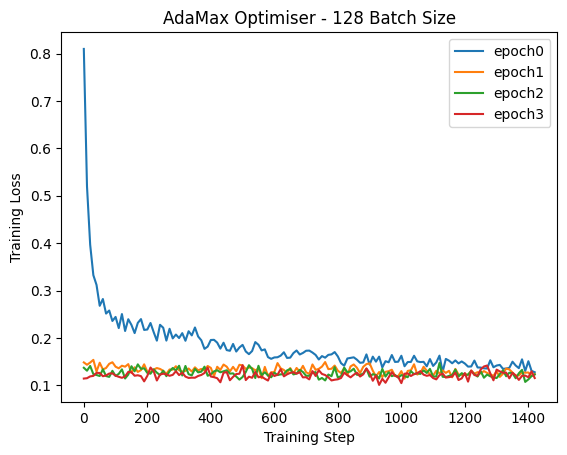

In [24]:
epoch0 = [[0.8097755312919617, 0], [0.519804835319519, 10], [0.3965773284435272, 20], [0.33239394426345825, 30], [0.31183356046676636, 40], [0.2677801549434662, 50], [0.28209561109542847, 60], [0.2513706684112549, 70], [0.2577802836894989, 80], [0.23573856055736542, 90], [0.24431639909744263, 100], [0.22073614597320557, 110], [0.2503831386566162, 120], [0.21459338068962097, 130], [0.23945844173431396, 140], [0.22739169001579285, 150], [0.21019181609153748, 160], [0.23170599341392517, 170], [0.23973312973976135, 180], [0.21684542298316956, 190], [0.21775782108306885, 200], [0.23149436712265015, 210], [0.21220239996910095, 220], [0.1942417025566101, 230], [0.22767508029937744, 240], [0.22152332961559296, 250], [0.19434556365013123, 260], [0.21924853324890137, 270], [0.19897836446762085, 280], [0.20711438357830048, 290], [0.19970908761024475, 300], [0.21009115874767303, 310], [0.19400009512901306, 320], [0.21409384906291962, 330], [0.205325648188591, 340], [0.22202977538108826, 350], [0.20302598178386688, 360], [0.19499525427818298, 370], [0.1768934726715088, 380], [0.18167273700237274, 390], [0.19562064111232758, 400], [0.19598256051540375, 410], [0.19007091224193573, 420], [0.17746636271476746, 430], [0.18987241387367249, 440], [0.1743171513080597, 450], [0.17283949255943298, 460], [0.18728028237819672, 470], [0.17128930985927582, 480], [0.17980580031871796, 490], [0.18533353507518768, 500], [0.1714349240064621, 510], [0.1657526195049286, 520], [0.17238080501556396, 530], [0.19119034707546234, 540], [0.18554425239562988, 550], [0.17363576591014862, 560], [0.17583231627941132, 570], [0.15943334996700287, 580], [0.15585312247276306, 590], [0.15881529450416565, 600], [0.15918591618537903, 610], [0.1626010686159134, 620], [0.16968870162963867, 630], [0.15779900550842285, 640], [0.15838022530078888, 650], [0.16797077655792236, 660], [0.17345033586025238, 670], [0.16503876447677612, 680], [0.16827885806560516, 690], [0.1729249209165573, 700], [0.17326518893241882, 710], [0.16917084157466888, 720], [0.1640579104423523, 730], [0.15445372462272644, 740], [0.16167017817497253, 750], [0.15829120576381683, 760], [0.1642453968524933, 770], [0.16526857018470764, 780], [0.17011897265911102, 790], [0.16092327237129211, 800], [0.1467459350824356, 810], [0.1413145363330841, 820], [0.15662550926208496, 830], [0.15789459645748138, 840], [0.15905669331550598, 850], [0.1540791094303131, 860], [0.14746752381324768, 870], [0.14826904237270355, 880], [0.16521817445755005, 890], [0.14364218711853027, 900], [0.1605050414800644, 910], [0.1499391496181488, 920], [0.1604813039302826, 930], [0.13772404193878174, 940], [0.15088027715682983, 950], [0.14856116473674774, 960], [0.16391494870185852, 970], [0.1493174135684967, 980], [0.14980299770832062, 990], [0.16236448287963867, 1000], [0.14022403955459595, 1010], [0.14915016293525696, 1020], [0.1492953896522522, 1030], [0.16238701343536377, 1040], [0.1505182683467865, 1050], [0.1490340679883957, 1060], [0.149540513753891, 1070], [0.14006462693214417, 1080], [0.15536639094352722, 1090], [0.1408987045288086, 1100], [0.14831095933914185, 1110], [0.16262578964233398, 1120], [0.12847362458705902, 1130], [0.1557210385799408, 1140], [0.1520722508430481, 1150], [0.14646649360656738, 1160], [0.15253455936908722, 1170], [0.14622735977172852, 1180], [0.15033791959285736, 1190], [0.14594116806983948, 1200], [0.1394556164741516, 1210], [0.1397862434387207, 1220], [0.1522114872932434, 1230], [0.13771191239356995, 1240], [0.13737305998802185, 1250], [0.135795459151268, 1260], [0.135493665933609, 1270], [0.15279048681259155, 1280], [0.13808000087738037, 1290], [0.1417146623134613, 1300], [0.1430836021900177, 1310], [0.1347765326499939, 1320], [0.13538166880607605, 1330], [0.13686585426330566, 1340], [0.1497982144355774, 1350], [0.14177890121936798, 1360], [0.1362125426530838, 1370], [0.15479688346385956, 1380], [0.130177304148674, 1390], [0.15084058046340942, 1400], [0.13048575818538666, 1410], [0.12756413221359253, 1420]]
epoch1 = [[0.14834339916706085, 0], [0.14337162673473358, 10], [0.14803630113601685, 20], [0.15369588136672974, 30], [0.12900382280349731, 40], [0.14765964448451996, 50], [0.13354018330574036, 60], [0.136519193649292, 70], [0.14536023139953613, 80], [0.14862829446792603, 90], [0.1392689198255539, 100], [0.13589105010032654, 110], [0.14134112000465393, 120], [0.13931161165237427, 130], [0.1447024792432785, 140], [0.12611326575279236, 150], [0.13798034191131592, 160], [0.1282290518283844, 170], [0.13202843070030212, 180], [0.14429311454296112, 190], [0.12870916724205017, 200], [0.12757378816604614, 210], [0.13326118886470795, 220], [0.13642776012420654, 230], [0.13451167941093445, 240], [0.13066944479942322, 250], [0.12421071529388428, 260], [0.1333886831998825, 270], [0.1329580396413803, 280], [0.14030560851097107, 290], [0.13188296556472778, 300], [0.12901979684829712, 310], [0.1304805874824524, 320], [0.13547596335411072, 330], [0.12898167967796326, 340], [0.1379985213279724, 350], [0.13147233426570892, 360], [0.13452546298503876, 370], [0.1310112327337265, 380], [0.14080840349197388, 390], [0.1367347091436386, 400], [0.1192612573504448, 410], [0.13911181688308716, 420], [0.13244356215000153, 430], [0.14382609724998474, 440], [0.13932600617408752, 450], [0.12931174039840698, 460], [0.13896575570106506, 470], [0.12985333800315857, 480], [0.1433033049106598, 490], [0.14202378690242767, 500], [0.13447406888008118, 510], [0.13770374655723572, 520], [0.13619115948677063, 530], [0.1315940022468567, 540], [0.13524013757705688, 550], [0.11492647230625153, 560], [0.13887932896614075, 570], [0.11978940665721893, 580], [0.12745462357997894, 590], [0.1279706507921219, 600], [0.14688177406787872, 610], [0.1358013153076172, 620], [0.1323738694190979, 630], [0.12564711272716522, 640], [0.13641512393951416, 650], [0.12499093264341354, 660], [0.13658414781093597, 670], [0.1288784295320511, 680], [0.14106106758117676, 690], [0.12756770849227905, 700], [0.12401347607374191, 710], [0.1439998596906662, 720], [0.13258442282676697, 730], [0.13474148511886597, 740], [0.13950587809085846, 750], [0.14907178282737732, 760], [0.1341981440782547, 770], [0.13492852449417114, 780], [0.14170414209365845, 790], [0.13073846697807312, 800], [0.12586626410484314, 810], [0.13625186681747437, 820], [0.12137167900800705, 830], [0.13986653089523315, 840], [0.14399373531341553, 850], [0.1370900720357895, 860], [0.1258866786956787, 870], [0.13906675577163696, 880], [0.14474716782569885, 890], [0.14642706513404846, 900], [0.1309412568807602, 910], [0.11874978244304657, 920], [0.12801530957221985, 930], [0.11738809198141098, 940], [0.12848131358623505, 950], [0.12978368997573853, 960], [0.1328236162662506, 970], [0.12036208808422089, 980], [0.11935776472091675, 990], [0.12993137538433075, 1000], [0.11410685628652573, 1010], [0.13039641082286835, 1020], [0.13173052668571472, 1030], [0.14436832070350647, 1040], [0.12274709343910217, 1050], [0.12611621618270874, 1060], [0.13914263248443604, 1070], [0.13077625632286072, 1080], [0.12312985956668854, 1090], [0.1207541674375534, 1100], [0.13070683181285858, 1110], [0.12523725628852844, 1120], [0.13141635060310364, 1130], [0.12617768347263336, 1140], [0.13056913018226624, 1150], [0.11685086786746979, 1160], [0.13459253311157227, 1170], [0.12273971736431122, 1180], [0.12203436344861984, 1190], [0.12392052263021469, 1200], [0.12169554829597473, 1210], [0.13100801408290863, 1220], [0.12448129057884216, 1230], [0.12781323492527008, 1240], [0.125008225440979, 1250], [0.12999886274337769, 1260], [0.12618334591388702, 1270], [0.1228945255279541, 1280], [0.12003001570701599, 1290], [0.12949758768081665, 1300], [0.11770787835121155, 1310], [0.12443302571773529, 1320], [0.13553090393543243, 1330], [0.13346706330776215, 1340], [0.1270100176334381, 1350], [0.12036733329296112, 1360], [0.12076812982559204, 1370], [0.1272362470626831, 1380], [0.1266445368528366, 1390], [0.12708836793899536, 1400], [0.11990343034267426, 1410], [0.1235579401254654, 1420]]
epoch2 = [[0.13701391220092773, 0], [0.1308240294456482, 10], [0.14086627960205078, 20], [0.12360775470733643, 30], [0.12177877128124237, 40], [0.1196151077747345, 50], [0.13371428847312927, 60], [0.11956632137298584, 70], [0.11777947843074799, 80], [0.13060729205608368, 90], [0.11971726268529892, 100], [0.12414199113845825, 110], [0.13369020819664001, 120], [0.1143975704908371, 130], [0.12266906350851059, 140], [0.14025074243545532, 150], [0.12951332330703735, 160], [0.144213005900383, 170], [0.1347840279340744, 180], [0.1359761506319046, 190], [0.12608131766319275, 200], [0.12451638281345367, 210], [0.13370129466056824, 220], [0.1267084777355194, 230], [0.12164559215307236, 240], [0.13058683276176453, 250], [0.11933957040309906, 260], [0.12959739565849304, 270], [0.1365770548582077, 280], [0.1311686933040619, 290], [0.14126336574554443, 300], [0.1207142025232315, 310], [0.1408257782459259, 320], [0.12344241142272949, 330], [0.12105702608823776, 340], [0.13470903038978577, 350], [0.12738025188446045, 360], [0.12874481081962585, 370], [0.13935112953186035, 380], [0.1201496347784996, 390], [0.12336628139019012, 400], [0.12937861680984497, 410], [0.13182179629802704, 420], [0.12744973599910736, 430], [0.12962064146995544, 440], [0.1317051500082016, 450], [0.12464716285467148, 460], [0.12519171833992004, 470], [0.11844982951879501, 480], [0.11206411570310593, 490], [0.11753369867801666, 500], [0.1280789077281952, 510], [0.1424073874950409, 520], [0.1344042420387268, 530], [0.11528763175010681, 540], [0.14117716252803802, 550], [0.1214737594127655, 560], [0.12750187516212463, 570], [0.1208873838186264, 580], [0.11693376302719116, 590], [0.1266876608133316, 600], [0.12158285081386566, 610], [0.12310086190700531, 620], [0.12337329238653183, 630], [0.13148456811904907, 640], [0.13453435897827148, 650], [0.12298540771007538, 660], [0.12484577298164368, 670], [0.13261204957962036, 680], [0.12806479632854462, 690], [0.12010949850082397, 700], [0.12007163465023041, 710], [0.12635134160518646, 720], [0.12787297368049622, 730], [0.11196854710578918, 740], [0.11545073986053467, 750], [0.11025641858577728, 760], [0.12276163697242737, 770], [0.11919661611318588, 780], [0.13838458061218262, 790], [0.11646479368209839, 800], [0.1193564236164093, 810], [0.1371886134147644, 820], [0.127603679895401, 830], [0.1294645071029663, 840], [0.1350722461938858, 850], [0.12226831912994385, 860], [0.12178903818130493, 870], [0.12480631470680237, 880], [0.13496708869934082, 890], [0.11817772686481476, 900], [0.12343673408031464, 910], [0.12156852334737778, 920], [0.11441653966903687, 930], [0.13465969264507294, 940], [0.11840976774692535, 950], [0.12759332358837128, 960], [0.1193074882030487, 970], [0.12165957689285278, 980], [0.11625676602125168, 990], [0.12149026244878769, 1000], [0.11921706050634384, 1010], [0.11711754649877548, 1020], [0.12998658418655396, 1030], [0.1233641728758812, 1040], [0.12597030401229858, 1050], [0.12412061542272568, 1060], [0.13152238726615906, 1070], [0.12602001428604126, 1080], [0.13469846546649933, 1090], [0.11842679977416992, 1100], [0.11852666735649109, 1110], [0.1470460146665573, 1120], [0.11804245412349701, 1130], [0.11748144030570984, 1140], [0.11982576549053192, 1150], [0.12179949134588242, 1160], [0.1332537978887558, 1170], [0.11830103397369385, 1180], [0.12562958896160126, 1190], [0.12174016237258911, 1200], [0.12262602150440216, 1210], [0.1300581693649292, 1220], [0.12343713641166687, 1230], [0.11849787831306458, 1240], [0.12958544492721558, 1250], [0.11603730916976929, 1260], [0.12261395901441574, 1270], [0.11902318894863129, 1280], [0.1166732907295227, 1290], [0.1153620108962059, 1300], [0.12351523339748383, 1310], [0.1317324936389923, 1320], [0.11911983788013458, 1330], [0.1265479177236557, 1340], [0.12569177150726318, 1350], [0.11490054428577423, 1360], [0.1253962367773056, 1370], [0.13253885507583618, 1380], [0.10717378556728363, 1390], [0.1124948114156723, 1400], [0.11959417909383774, 1410], [0.12282687425613403, 1420]]
epoch3 = [[0.1142469048500061, 0], [0.11499416083097458, 10], [0.11882637441158295, 20], [0.11988463997840881, 30], [0.1262795627117157, 40], [0.126067116856575, 50], [0.11917126178741455, 60], [0.12086733430624008, 70], [0.1248488649725914, 80], [0.12523242831230164, 90], [0.12036894261837006, 100], [0.11792950332164764, 110], [0.11587083339691162, 120], [0.11877164244651794, 130], [0.12830331921577454, 140], [0.1276392638683319, 150], [0.12021153420209885, 160], [0.12120386958122253, 170], [0.11934467405080795, 180], [0.10830587148666382, 190], [0.11997278779745102, 200], [0.13751721382141113, 210], [0.12978056073188782, 220], [0.11017777770757675, 230], [0.12270045280456543, 240], [0.1245441660284996, 250], [0.12305998802185059, 260], [0.1201070100069046, 270], [0.12200289964675903, 280], [0.12973497807979584, 290], [0.12157362699508667, 300], [0.12667541205883026, 310], [0.11838291585445404, 320], [0.11556895822286606, 330], [0.11613832414150238, 340], [0.1160147413611412, 350], [0.11970844119787216, 360], [0.12185832858085632, 370], [0.12596842646598816, 380], [0.13734959065914154, 390], [0.1185823604464531, 400], [0.11715184152126312, 410], [0.11501649022102356, 420], [0.10642324388027191, 430], [0.12643420696258545, 440], [0.1278955340385437, 450], [0.11070309579372406, 460], [0.11785370111465454, 470], [0.12382525205612183, 480], [0.1244133710861206, 490], [0.14255070686340332, 500], [0.11104287952184677, 510], [0.11822465062141418, 520], [0.11588047444820404, 530], [0.1282930076122284, 540], [0.11694838851690292, 550], [0.11831234395503998, 560], [0.11382852494716644, 570], [0.11004670709371567, 580], [0.1266784965991974, 590], [0.11964508891105652, 600], [0.12229841947555542, 610], [0.13426163792610168, 620], [0.11890020966529846, 630], [0.12314853072166443, 640], [0.12617796659469604, 650], [0.1275162696838379, 660], [0.12454788386821747, 670], [0.1275794804096222, 680], [0.11679445207118988, 690], [0.11710810661315918, 700], [0.11248363554477692, 710], [0.13003507256507874, 720], [0.11970935761928558, 730], [0.1317022144794464, 740], [0.12399431318044662, 750], [0.12169407308101654, 760], [0.11687375605106354, 770], [0.11028836667537689, 780], [0.11179526150226593, 790], [0.11269280314445496, 800], [0.11542590707540512, 810], [0.12659773230552673, 820], [0.1213102787733078, 830], [0.11675402522087097, 840], [0.12224447727203369, 850], [0.12665343284606934, 860], [0.1185656189918518, 870], [0.12315192818641663, 880], [0.13559624552726746, 890], [0.12594079971313477, 900], [0.10962401330471039, 910], [0.12072791904211044, 920], [0.10082550346851349, 930], [0.11365252733230591, 940], [0.10539957880973816, 950], [0.11703157424926758, 960], [0.1276901364326477, 970], [0.11989052593708038, 980], [0.11766374111175537, 990], [0.10461756587028503, 1000], [0.12446656823158264, 1010], [0.12525537610054016, 1020], [0.11965283751487732, 1030], [0.12370955944061279, 1040], [0.12553922832012177, 1050], [0.12990480661392212, 1060], [0.12249357998371124, 1070], [0.12006835639476776, 1080], [0.12165223807096481, 1090], [0.11527620255947113, 1100], [0.11256623268127441, 1110], [0.12134189903736115, 1120], [0.12476861476898193, 1130], [0.11638109385967255, 1140], [0.11727552115917206, 1150], [0.11861352622509003, 1160], [0.1267763376235962, 1170], [0.11115837097167969, 1180], [0.11461406946182251, 1190], [0.1258993297815323, 1200], [0.10778185725212097, 1210], [0.13126806914806366, 1220], [0.12164092063903809, 1230], [0.12040917575359344, 1240], [0.1335221827030182, 1250], [0.1397254914045334, 1260], [0.1417417824268341, 1270], [0.12525588274002075, 1280], [0.1105620414018631, 1290], [0.13315317034721375, 1300], [0.12933628261089325, 1310], [0.12650227546691895, 1320], [0.12681180238723755, 1330], [0.11475887149572372, 1340], [0.12642663717269897, 1350], [0.12074839323759079, 1360], [0.11138829588890076, 1370], [0.11997904628515244, 1380], [0.12053382396697998, 1390], [0.1170729249715805, 1400], [0.12945018708705902, 1410], [0.11537998914718628, 1420]]

loss, step = zip(*epoch0)
loss1, step1 = zip(*epoch1)
loss2, step2 = zip(*epoch2)
loss3, step3 = zip(*epoch3)
plt.plot(step, loss, label='epoch0')
plt.plot(step1, loss1, label='epoch1')
plt.plot(step2, loss2, label='epoch2')
plt.plot(step3, loss3, label='epoch3')
plt.xlabel("Training Step")
plt.ylabel("Training Loss")
plt.title("AdaMax Optimiser - 128 Batch Size")
plt.legend()

Text(0.5, 1.0, 'AdaMax Optimiser - 500 Steps')

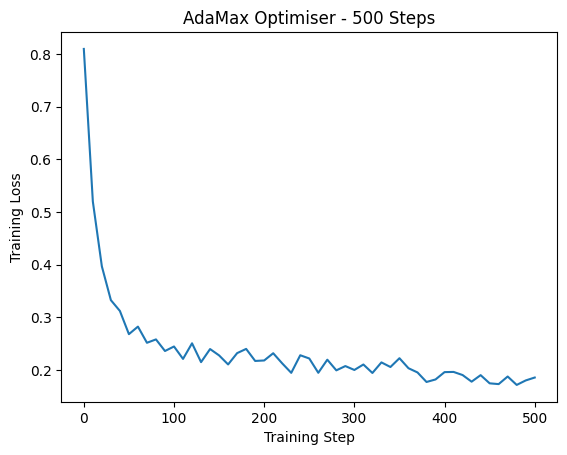

In [36]:
epoch500steps = [[0.8097755312919617, 0], [0.519804835319519, 10], [0.3965773284435272, 20], [0.33239394426345825, 30], [0.31183356046676636, 40], [0.2677801549434662, 50], [0.28209561109542847, 60], [0.2513706684112549, 70], [0.2577802836894989, 80], [0.23573856055736542, 90], [0.24431639909744263, 100], [0.22073614597320557, 110], [0.2503831386566162, 120], [0.21459338068962097, 130], [0.23945844173431396, 140], [0.22739169001579285, 150], [0.21019181609153748, 160], [0.23170599341392517, 170], [0.23973312973976135, 180], [0.21684542298316956, 190], [0.21775782108306885, 200], [0.23149436712265015, 210], [0.21220239996910095, 220], [0.1942417025566101, 230], [0.22767508029937744, 240], [0.22152332961559296, 250], [0.19434556365013123, 260], [0.21924853324890137, 270], [0.19897836446762085, 280], [0.20711438357830048, 290], [0.19970908761024475, 300], [0.21009115874767303, 310], [0.19400009512901306, 320], [0.21409384906291962, 330], [0.205325648188591, 340], [0.22202977538108826, 350], [0.20302598178386688, 360], [0.19499525427818298, 370], [0.1768934726715088, 380], [0.18167273700237274, 390], [0.19562064111232758, 400], [0.19598256051540375, 410], [0.19007091224193573, 420], [0.17746636271476746, 430], [0.18987241387367249, 440], [0.1743171513080597, 450], [0.17283949255943298, 460], [0.18728028237819672, 470], [0.17128930985927582, 480], [0.17980580031871796, 490], [0.18533353507518768, 500]]

loss500, step500 = zip(*epoch500steps)
plt.plot(step500, loss500)
plt.xlabel("Training Step")
plt.ylabel("Training Loss")
plt.title("AdaMax Optimiser - 500 Steps")

Lion optimizer with learning rate 0.0001 and 3 epochs.

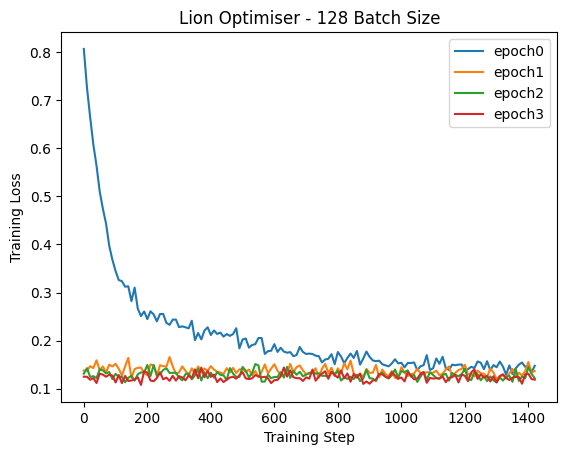

In [19]:
epoch0 = [[0.8066650629043579, 0], [0.725506067276001, 10], [0.6643359661102295, 20], [0.6076068878173828, 30], [0.5637097358703613, 40], [0.5102543830871582, 50], [0.47426390647888184, 60], [0.4434386193752289, 70], [0.397317111492157, 80], [0.3681110143661499, 90], [0.34473294019699097, 100], [0.32594922184944153, 110], [0.32349535822868347, 120], [0.31212201714515686, 130], [0.31282415986061096, 140], [0.2820813059806824, 150], [0.31025704741477966, 160], [0.2662092447280884, 170], [0.2510199248790741, 180], [0.2605118453502655, 190], [0.2447635382413864, 200], [0.2608053684234619, 210], [0.2544393539428711, 220], [0.23998424410820007, 230], [0.2553367018699646, 240], [0.2553696632385254, 250], [0.2368030995130539, 260], [0.23278169333934784, 270], [0.2436208724975586, 280], [0.24374262988567352, 290], [0.2279348075389862, 300], [0.22958479821681976, 310], [0.22764849662780762, 320], [0.22544798254966736, 330], [0.24126136302947998, 340], [0.2008703351020813, 350], [0.2157580852508545, 360], [0.2024831771850586, 370], [0.22094444930553436, 380], [0.22759801149368286, 390], [0.2116309404373169, 400], [0.22107325494289398, 410], [0.21383170783519745, 420], [0.21657061576843262, 430], [0.20823362469673157, 440], [0.21355536580085754, 450], [0.20982855558395386, 460], [0.21357572078704834, 470], [0.22572392225265503, 480], [0.18403765559196472, 490], [0.20236800611019135, 500], [0.20426605641841888, 510], [0.18538302183151245, 520], [0.19086015224456787, 530], [0.19252370297908783, 540], [0.2054537832736969, 550], [0.20527224242687225, 560], [0.1722044199705124, 570], [0.17811685800552368, 580], [0.17889361083507538, 590], [0.1926352083683014, 600], [0.17636701464653015, 610], [0.1850425899028778, 620], [0.17717550694942474, 630], [0.17480438947677612, 640], [0.1760588139295578, 650], [0.16757023334503174, 660], [0.16996389627456665, 670], [0.1866673082113266, 680], [0.17630761861801147, 690], [0.17218224704265594, 700], [0.17296640574932098, 710], [0.1720670759677887, 720], [0.16862687468528748, 730], [0.16754961013793945, 740], [0.1545112133026123, 750], [0.16065554320812225, 760], [0.16219377517700195, 770], [0.17176905274391174, 780], [0.15090250968933105, 790], [0.17623591423034668, 800], [0.16688017547130585, 810], [0.15291960537433624, 820], [0.16381791234016418, 830], [0.17306795716285706, 840], [0.16398337483406067, 850], [0.1784437894821167, 860], [0.15000174939632416, 870], [0.16266945004463196, 880], [0.17719702422618866, 890], [0.16613297164440155, 900], [0.15866735577583313, 910], [0.15714317560195923, 920], [0.15824085474014282, 930], [0.15084567666053772, 940], [0.14848212897777557, 950], [0.146473228931427, 960], [0.15254543721675873, 970], [0.16116641461849213, 980], [0.15260379016399384, 990], [0.15371070802211761, 1000], [0.14442674815654755, 1010], [0.15346375107765198, 1020], [0.15331357717514038, 1030], [0.1545647829771042, 1040], [0.13861003518104553, 1050], [0.14640682935714722, 1060], [0.1488860696554184, 1070], [0.16979102790355682, 1080], [0.1388627290725708, 1090], [0.14237330853939056, 1100], [0.1627923548221588, 1110], [0.15174970030784607, 1120], [0.16638976335525513, 1130], [0.1421847939491272, 1140], [0.13915547728538513, 1150], [0.14993634819984436, 1160], [0.14870396256446838, 1170], [0.15007740259170532, 1180], [0.15018686652183533, 1190], [0.13659045100212097, 1200], [0.14074218273162842, 1210], [0.14548581838607788, 1220], [0.14287063479423523, 1230], [0.15650224685668945, 1240], [0.1540120244026184, 1250], [0.14057359099388123, 1260], [0.1571187525987625, 1270], [0.13798564672470093, 1280], [0.1490195244550705, 1290], [0.14450831711292267, 1300], [0.15641501545906067, 1310], [0.1458549201488495, 1320], [0.12904244661331177, 1330], [0.14842073619365692, 1340], [0.13070468604564667, 1350], [0.14232699573040009, 1360], [0.14994972944259644, 1370], [0.15440401434898376, 1380], [0.14541903138160706, 1390], [0.14720234274864197, 1400], [0.13439244031906128, 1410], [0.14756137132644653, 1420]]
epoch1 = [[0.13762417435646057, 0], [0.1372123658657074, 10], [0.14678320288658142, 20], [0.14264464378356934, 30], [0.15891404449939728, 40], [0.13835541903972626, 50], [0.14621756970882416, 60], [0.13376064598560333, 70], [0.15002815425395966, 80], [0.1461889147758484, 90], [0.1517924964427948, 100], [0.1413561999797821, 110], [0.12720923125743866, 120], [0.14623859524726868, 130], [0.1640326976776123, 140], [0.12221060693264008, 150], [0.14083236455917358, 160], [0.14340564608573914, 170], [0.14394864439964294, 180], [0.13263355195522308, 190], [0.12782013416290283, 200], [0.15035390853881836, 210], [0.14820687472820282, 220], [0.1260593831539154, 230], [0.148768812417984, 240], [0.1468401551246643, 250], [0.1458110213279724, 260], [0.16565066576004028, 270], [0.14645269513130188, 280], [0.13086269795894623, 290], [0.13399559259414673, 300], [0.14630767703056335, 310], [0.13724485039710999, 320], [0.12706610560417175, 330], [0.14228054881095886, 340], [0.13163095712661743, 350], [0.14614196121692657, 360], [0.1336858719587326, 370], [0.1419275999069214, 380], [0.1370246708393097, 390], [0.1469103991985321, 400], [0.1395387351512909, 410], [0.13492721319198608, 420], [0.13359683752059937, 430], [0.13061900436878204, 440], [0.14264515042304993, 450], [0.13399522006511688, 460], [0.14318066835403442, 470], [0.13278339803218842, 480], [0.13996194303035736, 490], [0.14095503091812134, 500], [0.134860098361969, 510], [0.13980557024478912, 520], [0.12772828340530396, 530], [0.13652049005031586, 540], [0.12384730577468872, 550], [0.13489755988121033, 560], [0.15041236579418182, 570], [0.1317061483860016, 580], [0.14168885350227356, 590], [0.15085025131702423, 600], [0.13746118545532227, 610], [0.12842407822608948, 620], [0.12961345911026, 630], [0.13181817531585693, 640], [0.15163573622703552, 650], [0.13390851020812988, 660], [0.14476582407951355, 670], [0.14821851253509521, 680], [0.13818061351776123, 690], [0.1299268752336502, 700], [0.13310758769512177, 710], [0.13283249735832214, 720], [0.1425030380487442, 730], [0.12245112657546997, 740], [0.14133450388908386, 750], [0.1514781266450882, 760], [0.1323336660861969, 770], [0.14344538748264313, 780], [0.1263504922389984, 790], [0.14224806427955627, 800], [0.1320214867591858, 810], [0.15293508768081665, 820], [0.1402963399887085, 830], [0.15844641625881195, 840], [0.13124355673789978, 850], [0.12709468603134155, 860], [0.13097192347049713, 870], [0.12424051761627197, 880], [0.14117008447647095, 890], [0.13301339745521545, 900], [0.13311553001403809, 910], [0.14928466081619263, 920], [0.12354658544063568, 930], [0.13976788520812988, 940], [0.13049930334091187, 950], [0.12594717741012573, 960], [0.1365504264831543, 970], [0.12270744144916534, 980], [0.12029893696308136, 990], [0.1446342170238495, 1000], [0.13319185376167297, 1010], [0.12650176882743835, 1020], [0.12982085347175598, 1030], [0.13175372779369354, 1040], [0.14086630940437317, 1050], [0.13309624791145325, 1060], [0.13174107670783997, 1070], [0.13427922129631042, 1080], [0.13327965140342712, 1090], [0.1331215351819992, 1100], [0.13750946521759033, 1110], [0.1276942491531372, 1120], [0.13110294938087463, 1130], [0.13998819887638092, 1140], [0.1462404429912567, 1150], [0.12482641637325287, 1160], [0.13281528651714325, 1170], [0.13873760402202606, 1180], [0.14129257202148438, 1190], [0.14971649646759033, 1200], [0.12961380183696747, 1210], [0.1305452585220337, 1220], [0.12540946900844574, 1230], [0.13750992715358734, 1240], [0.13193395733833313, 1250], [0.1310102641582489, 1260], [0.12383439391851425, 1270], [0.14186933636665344, 1280], [0.13355128467082977, 1290], [0.12014269828796387, 1300], [0.12559708952903748, 1310], [0.12786629796028137, 1320], [0.12106718868017197, 1330], [0.1314137578010559, 1340], [0.14106705784797668, 1350], [0.12422002851963043, 1360], [0.13330872356891632, 1370], [0.1272808015346527, 1380], [0.13667744398117065, 1390], [0.1553947627544403, 1400], [0.133335679769516, 1410], [0.1368318796157837, 1420]]
epoch2 = [[0.13108249008655548, 0], [0.14272645115852356, 10], [0.12427704781293869, 20], [0.12599818408489227, 30], [0.12199710309505463, 40], [0.14006203413009644, 50], [0.13820716738700867, 60], [0.13176178932189941, 70], [0.13451234996318817, 80], [0.1200752779841423, 90], [0.13073986768722534, 100], [0.12460021674633026, 110], [0.12457844614982605, 120], [0.11330559849739075, 130], [0.12267099320888519, 140], [0.1267806887626648, 150], [0.11668655276298523, 160], [0.13006892800331116, 170], [0.1338036209344864, 180], [0.13364505767822266, 190], [0.1493080109357834, 200], [0.1263609230518341, 210], [0.14917904138565063, 220], [0.12847688794136047, 230], [0.130497545003891, 240], [0.1388852298259735, 250], [0.14254875481128693, 260], [0.13277925550937653, 270], [0.13301217555999756, 280], [0.1331196278333664, 290], [0.12292145192623138, 300], [0.11731672286987305, 310], [0.13017065823078156, 320], [0.13170333206653595, 330], [0.11957111209630966, 340], [0.1276407241821289, 350], [0.1407712697982788, 360], [0.11698542535305023, 370], [0.1343303918838501, 380], [0.12172006070613861, 390], [0.13323095440864563, 400], [0.12305106967687607, 410], [0.13451838493347168, 420], [0.1288459151983261, 430], [0.1276322901248932, 440], [0.11800317466259003, 450], [0.14285166561603546, 460], [0.13147439062595367, 470], [0.12428341805934906, 480], [0.12426033616065979, 490], [0.14522090554237366, 500], [0.13717353343963623, 510], [0.12320106476545334, 520], [0.13293997943401337, 530], [0.15113958716392517, 540], [0.14844749867916107, 550], [0.11448966711759567, 560], [0.11481906473636627, 570], [0.12918007373809814, 580], [0.12169373035430908, 590], [0.12452199310064316, 600], [0.12407505512237549, 610], [0.13429081439971924, 620], [0.12307830154895782, 630], [0.14543293416500092, 640], [0.12242244184017181, 650], [0.1369001269340515, 660], [0.128912553191185, 670], [0.13502369821071625, 680], [0.12580904364585876, 690], [0.12920832633972168, 700], [0.13216012716293335, 710], [0.13490653038024902, 720], [0.1312352865934372, 730], [0.1322568655014038, 740], [0.12667706608772278, 750], [0.126830592751503, 760], [0.12454315274953842, 770], [0.13516241312026978, 780], [0.13046914339065552, 790], [0.13663765788078308, 800], [0.11692331731319427, 810], [0.12335926294326782, 820], [0.12034781277179718, 830], [0.12500599026679993, 840], [0.1200638934969902, 850], [0.1288568675518036, 860], [0.1157529354095459, 870], [0.12116297334432602, 880], [0.13909737765789032, 890], [0.12185236811637878, 900], [0.1208992451429367, 910], [0.11576400697231293, 920], [0.12976835668087006, 930], [0.13306382298469543, 940], [0.1250416338443756, 950], [0.12114368379116058, 960], [0.1277868002653122, 970], [0.13995639979839325, 980], [0.12389650195837021, 990], [0.13654550909996033, 1000], [0.13431498408317566, 1010], [0.1380312740802765, 1020], [0.12486046552658081, 1030], [0.12855768203735352, 1040], [0.11406725645065308, 1050], [0.12483498454093933, 1060], [0.13434088230133057, 1070], [0.11872901022434235, 1080], [0.13407036662101746, 1090], [0.12841641902923584, 1100], [0.12256355583667755, 1110], [0.120655857026577, 1120], [0.12853491306304932, 1130], [0.13090837001800537, 1140], [0.11657407134771347, 1150], [0.13249658048152924, 1160], [0.12838362157344818, 1170], [0.12605634331703186, 1180], [0.13048435747623444, 1190], [0.1415037214756012, 1200], [0.12021474540233612, 1210], [0.11777886003255844, 1220], [0.13464653491973877, 1230], [0.13002899289131165, 1240], [0.117403045296669, 1250], [0.12592247128486633, 1260], [0.11568957567214966, 1270], [0.12547867000102997, 1280], [0.11729103326797485, 1290], [0.11285680532455444, 1300], [0.12346788495779037, 1310], [0.11674370616674423, 1320], [0.12489871680736542, 1330], [0.12645022571086884, 1340], [0.11432993412017822, 1350], [0.14095264673233032, 1360], [0.11621600389480591, 1370], [0.12546290457248688, 1380], [0.12164803594350815, 1390], [0.14487795531749725, 1400], [0.13072839379310608, 1410], [0.12157192081212997, 1420]]
epoch3 = [[0.12485311925411224, 0], [0.12479355186223984, 10], [0.11852773278951645, 20], [0.12192076444625854, 30], [0.11170383542776108, 40], [0.13147255778312683, 50], [0.12917369604110718, 60], [0.1248573288321495, 70], [0.12880761921405792, 80], [0.1273401826620102, 90], [0.11297553777694702, 100], [0.12825028598308563, 110], [0.11162935197353363, 120], [0.12645234167575836, 130], [0.11597394943237305, 140], [0.11697938293218613, 150], [0.1189330667257309, 160], [0.12377412617206573, 170], [0.10778951644897461, 180], [0.13641299307346344, 190], [0.13298290967941284, 200], [0.11705806851387024, 210], [0.11553742736577988, 220], [0.12218394130468369, 230], [0.13396015763282776, 240], [0.11946018785238266, 250], [0.12301164865493774, 260], [0.11618342250585556, 270], [0.1268017292022705, 280], [0.11682391166687012, 290], [0.12598416209220886, 300], [0.123316690325737, 310], [0.11751416325569153, 320], [0.12718500196933746, 330], [0.12210161983966827, 340], [0.1400875598192215, 350], [0.12177342176437378, 360], [0.14382179081439972, 370], [0.12384259700775146, 380], [0.13687239587306976, 390], [0.12458536028862, 400], [0.1293206810951233, 410], [0.11363368481397629, 420], [0.12126623839139938, 430], [0.11376725137233734, 440], [0.11890395730733871, 450], [0.12315001338720322, 460], [0.12489277124404907, 470], [0.12082697451114655, 480], [0.12808886170387268, 490], [0.13425672054290771, 500], [0.12130089849233627, 510], [0.11987918615341187, 520], [0.12149962037801743, 530], [0.12825316190719604, 540], [0.12574979662895203, 550], [0.1236182302236557, 560], [0.12480523437261581, 570], [0.12141935527324677, 580], [0.11157828569412231, 590], [0.1176764965057373, 600], [0.1182374656200409, 610], [0.12551060318946838, 620], [0.14396995306015015, 630], [0.12510916590690613, 640], [0.1381424367427826, 650], [0.12370771169662476, 660], [0.12182001769542694, 670], [0.12177318334579468, 680], [0.11599709838628769, 690], [0.12358832359313965, 700], [0.12082036584615707, 710], [0.1397930383682251, 720], [0.11658722162246704, 730], [0.125242680311203, 740], [0.13110142946243286, 750], [0.13617071509361267, 760], [0.1205817386507988, 770], [0.1349102258682251, 780], [0.12808877229690552, 790], [0.12289506196975708, 800], [0.1374717801809311, 810], [0.12166136503219604, 820], [0.13164430856704712, 830], [0.11456137895584106, 840], [0.13052070140838623, 850], [0.12270383536815643, 860], [0.1313963383436203, 870], [0.10995303839445114, 880], [0.11496930569410324, 890], [0.11030988395214081, 900], [0.11693821847438812, 910], [0.11895035952329636, 920], [0.13045287132263184, 930], [0.12956994771957397, 940], [0.12475812435150146, 950], [0.12203149497509003, 960], [0.13426309823989868, 970], [0.12742583453655243, 980], [0.12091919034719467, 990], [0.12320254743099213, 1000], [0.1151222437620163, 1010], [0.13428997993469238, 1020], [0.12741081416606903, 1030], [0.1194329559803009, 1040], [0.12093216180801392, 1050], [0.13063016533851624, 1060], [0.134602352976799, 1070], [0.11219953000545502, 1080], [0.12239459156990051, 1090], [0.12100353091955185, 1100], [0.12165842950344086, 1110], [0.12107506394386292, 1120], [0.12544430792331696, 1130], [0.11354874074459076, 1140], [0.12226077169179916, 1150], [0.12394001334905624, 1160], [0.12852653861045837, 1170], [0.11299444735050201, 1180], [0.1293690800666809, 1190], [0.12673409283161163, 1200], [0.11564575135707855, 1210], [0.13371288776397705, 1220], [0.1401432603597641, 1230], [0.12032753229141235, 1240], [0.1296946406364441, 1250], [0.12318409979343414, 1260], [0.12646156549453735, 1270], [0.11500018835067749, 1280], [0.12573324143886566, 1290], [0.11329485476016998, 1300], [0.12626832723617554, 1310], [0.12993475794792175, 1320], [0.12209814786911011, 1330], [0.11813002079725266, 1340], [0.12288065999746323, 1350], [0.1244003027677536, 1360], [0.12399528920650482, 1370], [0.11031027138233185, 1380], [0.1297232210636139, 1390], [0.13111543655395508, 1400], [0.11996470391750336, 1410], [0.11869382858276367, 1420]]

loss, step = zip(*epoch0)
loss1, step1 = zip(*epoch1)
loss2, step2 = zip(*epoch2)
loss3, step3 = zip(*epoch3)
plt.plot(step, loss, label='epoch0')
plt.plot(step1, loss1, label='epoch1')
plt.plot(step2, loss2, label='epoch2')
plt.plot(step3, loss3, label='epoch3')
plt.xlabel("Training Step")
plt.ylabel("Training Loss")
plt.title("Lion Optimiser - 128 Batch Size")
plt.legend()

Text(0.5, 1.0, 'Lion Optimiser - 500 Steps')

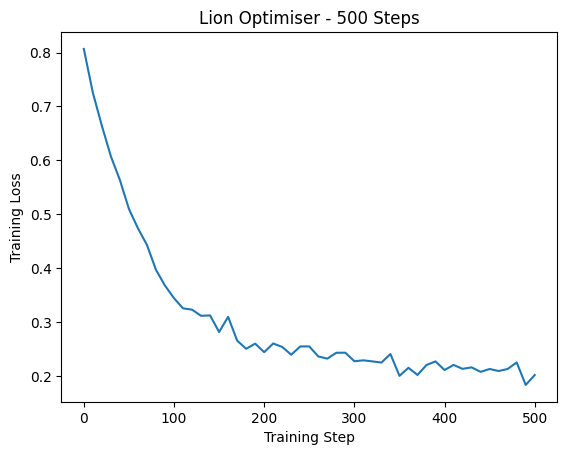

In [37]:
epoch500steps = [[0.8066650629043579, 0], [0.725506067276001, 10], [0.6643359661102295, 20], [0.6076068878173828, 30], [0.5637097358703613, 40], [0.5102543830871582, 50], [0.47426390647888184, 60], [0.4434386193752289, 70], [0.397317111492157, 80], [0.3681110143661499, 90], [0.34473294019699097, 100], [0.32594922184944153, 110], [0.32349535822868347, 120], [0.31212201714515686, 130], [0.31282415986061096, 140], [0.2820813059806824, 150], [0.31025704741477966, 160], [0.2662092447280884, 170], [0.2510199248790741, 180], [0.2605118453502655, 190], [0.2447635382413864, 200], [0.2608053684234619, 210], [0.2544393539428711, 220], [0.23998424410820007, 230], [0.2553367018699646, 240], [0.2553696632385254, 250], [0.2368030995130539, 260], [0.23278169333934784, 270], [0.2436208724975586, 280], [0.24374262988567352, 290], [0.2279348075389862, 300], [0.22958479821681976, 310], [0.22764849662780762, 320], [0.22544798254966736, 330], [0.24126136302947998, 340], [0.2008703351020813, 350], [0.2157580852508545, 360], [0.2024831771850586, 370], [0.22094444930553436, 380], [0.22759801149368286, 390], [0.2116309404373169, 400], [0.22107325494289398, 410], [0.21383170783519745, 420], [0.21657061576843262, 430], [0.20823362469673157, 440], [0.21355536580085754, 450], [0.20982855558395386, 460], [0.21357572078704834, 470], [0.22572392225265503, 480], [0.18403765559196472, 490], [0.20236800611019135, 500]]

loss500, step500 = zip(*epoch500steps)
plt.plot(step500, loss500)
plt.xlabel("Training Step")
plt.ylabel("Training Loss")
plt.title("Lion Optimiser - 500 Steps")